<a href="https://colab.research.google.com/github/camilaslins/ML_doencas_cardiacas/blob/main/ML_doen%C3%A7as_cardiacas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 💻 Projeto Aprendizagem de Máquina
####alunos: Camila Siqueira, Luhan Fernandes, Yasmin Branco
dataset: Dor no peito como indicador de doença cardiaca



#### 🔁 Conectando o Google Colab ao Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 📚 Importando as bibliotecas necessárias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

#### 📂 Abrindo o arquivo

In [ ]:
data = pd.read_csv("/content/data.csv")

data.head()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [ ]:
# como observamos, o dataset não veio com uma header com as categorias, e sim com uma linha de dados ocupando o lugar da coluna, então passamos o header = none para transforma-la em linha e substituir por um index

data = pd.read_csv("/content/data.csv", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


#### 👀 Dando uma olhada na estrutura geral dos dados

In [ ]:
#renomeando as colunas
data.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


#### #DICIONÁRIO DOS DADOS

age:
idade do paciente

sex:
gênero do paciente
(0 - mulher; 1 - homem)

cp:
tipo de dor no peito (1:'Angina Típica', 2:'angina atípica', 3:'dor não anginosa', 4:'assintomática')

tresbps:
pressão arterial em repouso (em mm Hg na admissão ao hospital)

chol:
colesterol sérico em mg/dl

fbs:
(açúcar no sangue em jejum > 120 mg/dl) (1 = verdadeiro; 0 = falso)

restecg:
resultados de ECG em repouso (0: 'normal', 1 e 2: 'anormal')

talach:
frequência cardíaca máxima alcançada

exang:
angina induzida por exercício (1 = sim; 0 = não)

oldpeak:
Depressão de ST induzida por exercício em relação ao repouso

slope:
a inclinação do segmento ST do exercício de pico (1: 'inclinação ascendente', 2: 'plana', 3: 'inclinação descendente)

ca:
número de vasos principais (0-3) coloridos por fluoroscopia

tal:
talassemia (3: 'normal', 6: 'defeito fixo', 7: 'defeito reversível')

num:
estado angiográfico da doença (0: sem doença cardíaca, > 0: doença cardíaca)
(ALVO DESTA ATIVIDADE)

In [ ]:
data.info() #nenhum valor nulo porém nem todos numéricos, 'ca' e 'thal' possuem "object"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    float64
 2   cp        302 non-null    float64
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    float64
 6   restecg   302 non-null    float64
 7   thalach   302 non-null    float64
 8   exang     302 non-null    float64
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    float64
 11  ca        302 non-null    object 
 12  thal      302 non-null    object 
 13  num       302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


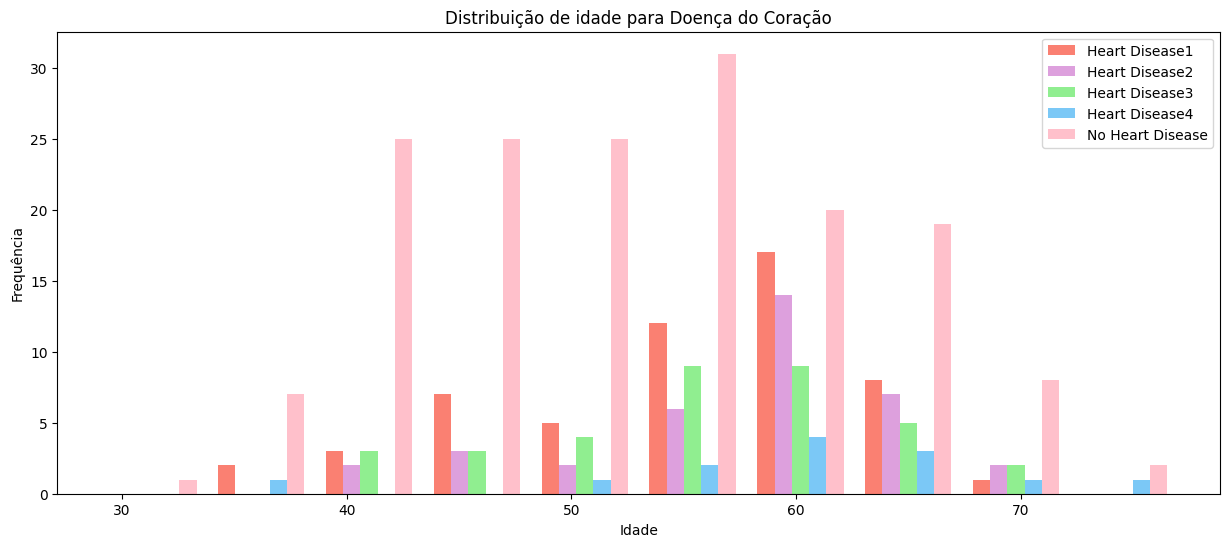

In [ ]:
#filtrando individuos com e sem doença do coracao
heart_disease1 = data[data['num'] == 1]['age']
heart_disease2 = data[data['num'] == 2]['age']
heart_disease3 = data[data['num'] == 3]['age']
heart_disease4 = data[data['num'] == 4]['age']
no_heart_disease = data[data['num'] == 0]['age']

# cria o histograma
plt.figure(figsize=(15,6))
plt.hist([heart_disease1, heart_disease2, heart_disease3, heart_disease4, no_heart_disease], color=['#FA8072','#DDA0DD','#90EE90','#7BC8F6','#FFC0CB'], label=['Heart Disease1', 'Heart Disease2', 'Heart Disease3', 'Heart Disease4', 'No Heart Disease'])
#coloca as labels e titulos e legenda
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Distribuição de idade para Doença do Coração')
#figsize=(20, 18)
plt.legend()
plt.show()

In [ ]:
noheartdisease = len(data.loc[data['num'] == 0])

print(f"A quantidade de pessoas que não possuem diagnóstico de doença cardíaca é: {noheartdisease}")

A quantidade de pessoas que não possuem diagnóstico de doença cardíaca é: 163


In [ ]:
data.select_dtypes([np.object]).tail() #verificando quais colunas possume os valores não numericos

<ipython-input-10-e77f07a08ce8>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.select_dtypes([np.object]).tail() #verificando quais colunas possume os valores não numericos


,ca,thal
297,0.0,7.0
298,2.0,7.0
299,1.0,7.0
300,1.0,3.0
301,?,3.0


In [ ]:
data['ca'].value_counts() #identificando a quantidade

0.0    175
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [ ]:
def caToFloat(value):
    if not value == '?':
       return float(value)
    else:
        return 0
data['ca'] = data['ca'].map(caToFloat)
data['ca'].value_counts() #substituindo ? por 0 pois é o dado que mais se repete

0.0    179
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [ ]:
data['thal'].value_counts()

3.0    166
7.0    117
6.0     17
?        2
Name: thal, dtype: int64

In [ ]:
data['thal'] = data['thal'].map(lambda x : 3.0 if x == '?' else float(x)) #substituindo ? por 3 pois é o dado que mais se repete
data['thal'].value_counts()

3.0    168
7.0    117
6.0     17
Name: thal, dtype: int64

In [ ]:
data["num"].value_counts()

0    163
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [ ]:
data['num'] = data.num.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1}) #aqui colocamos todas identificações de doença cardíaca como o mesmo número pois não importa qual é o tipo dela (até porque isso não foi específicado) mas importa se a pessoa possui ou não.

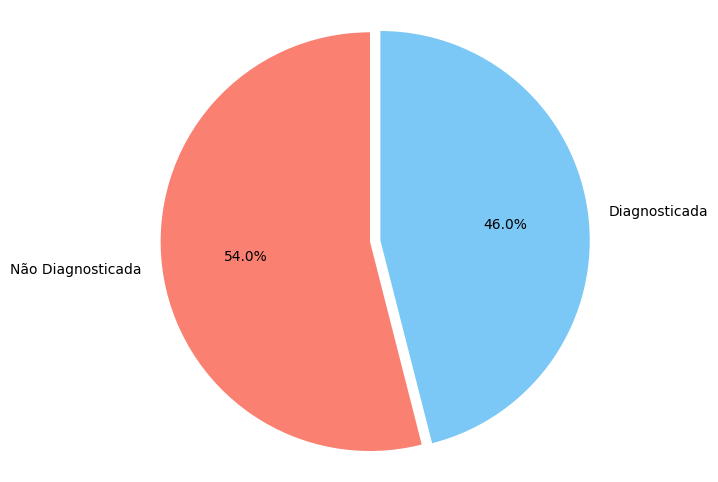

In [ ]:
# Grafico de pizza para observar a distribuição de pessoas com o diagnóstico de doença cardíaca
nodisease = len(data[data['num'] == 0])
yesdisease = len(data[data['num'] == 1])
labels = 'Não Diagnosticada','Diagnosticada'
sizes = [nodisease, yesdisease]
colors = ['#FA8072', '#7BC8F6']
explode = (0, 0.05)

plt.figure(figsize=(7,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=90)

plt.axis('equal') # Desenhar como círculo
plt.show()

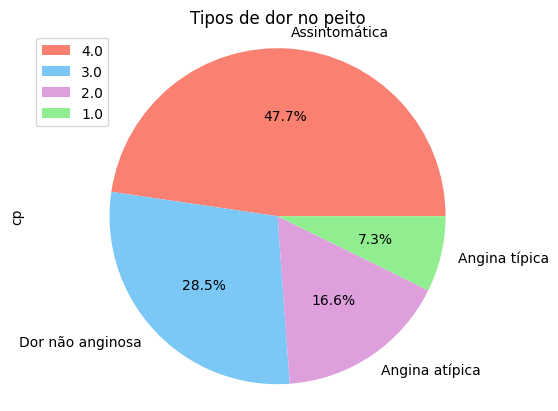

In [ ]:
# Gráfico mostrando as fdiferentes dores no peito
cp_counts = data['cp'].value_counts()
labels = 'Assintomática', 'Dor não anginosa', 'Angina atípica', 'Angina típica'
colors = ['#FA8072', '#7BC8F6','#DDA0DD', '#90EE90']
# Cria o gráfico com as porcentagens
cp_counts.plot.pie(autopct='%1.1f%%',labels=labels,colors=colors)

plt.title('Tipos de dor no peito')
plt.legend(labels=cp_counts.index, loc='upper left')
plt.axis('equal')

plt.show()

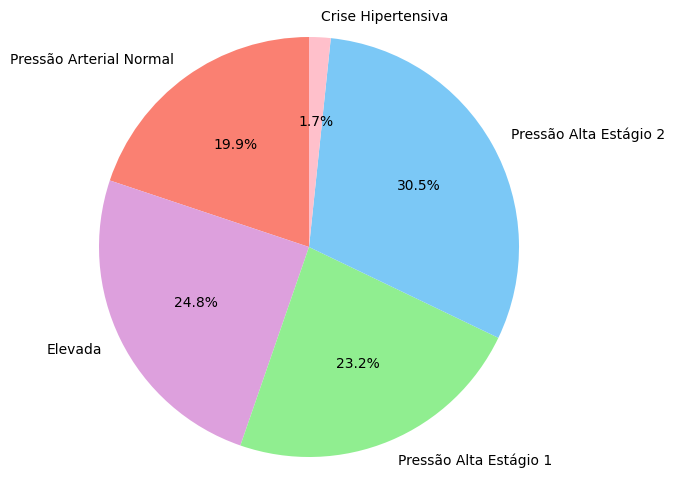

Total Count: 302


In [ ]:
normal = len(data[data['trestbps'] < 120])
elevated = len(data[data['trestbps'].between(120, 129)])
hbpOne = len(data[data['trestbps'].between(130, 139)])
hbpTwo = len(data[data['trestbps'].between(140, 179)])
crisis = len(data[data['trestbps'] >= 180])

labels = 'Pressão Arterial Normal','Elevada', 'Pressão Alta Estágio 1', 'Pressão Alta Estágio 2', 'Crise Hipertensiva'
sizes = [normal, elevated, hbpOne, hbpTwo, crisis]
explode = (0, 0, 0, 0, 0)
colors = ['#FA8072','#DDA0DD','#90EE90','#7BC8F6','#FFC0CB']

plt.figure(figsize=(7,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=90)

plt.axis('equal')
plt.show()

print("Total Count:", normal + elevated + hbpOne + hbpTwo + crisis) # For checking

#Como podemos ver, a minoria das pessoas presentes no dataset possui uma pressão aterial típica, podemos então afirmar que hipertensão pode ser uma das doenças cardíacas mais presentes dentre as pessoas diagnosticadas

<Axes: >

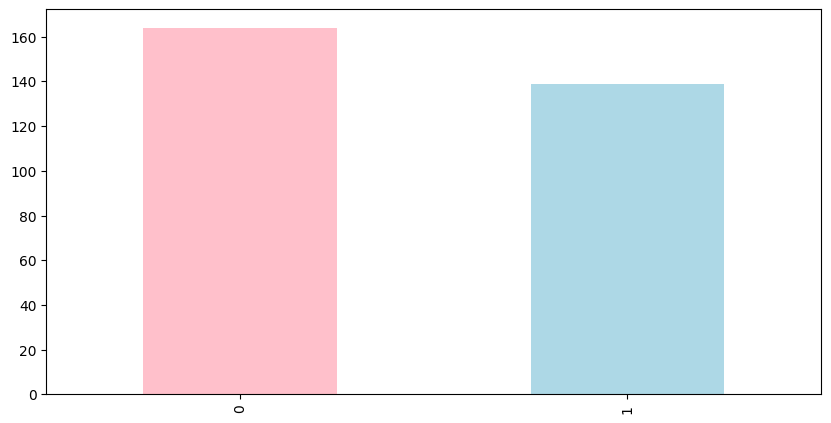

In [ ]:
data["num"].value_counts().plot(kind='bar', stacked=True, color=['pink', 'lightblue'], legend=False, figsize=(10, 5))

In [ ]:
data.info() #confirmamos que agora todos os dados são numericos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


#### 🧮 Algoritmos de classificação

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#### 🏋️ Treinando...

#### SVM

O objetivo principal do SVM é encontrar o hiperplano que melhor separa as classes dos dados de treinamento em um espaço multidimensional. O hiperplano é a representação de uma fronteira de decisão que melhor discrimina as classes. Para isso, o SVM busca maximizar a margem entre os exemplos de treinamento mais próximos de cada classe, conhecidos como vetores de suporte. Esses vetores de suporte são os pontos mais críticos para a definição do hiperplano ótimo.


In [ ]:
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

# Preencher valores ausentes com a média
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

A_TRAIN_SVM = (cm_train[0][0] + cm_train[1][1])/len(y_train)
A_TEST_SVM = (cm_test[0][0] + cm_test[1][1])/len(y_test)

print('Acurácia do set de treino do svm =', A_TRAIN_SVM)
print('Acurácia do set de treino do svm =', A_TEST_SVM)


Acurácia do set de treino do svm = 0.6514522821576764
Acurácia do set de treino do svm = 0.6885245901639344


#### Naive Bayes

O classificador Naive Bayes é um algoritmo de aprendizado de máquina supervisionado baseado no teorema de Bayes, que utiliza a probabilidade condicional para fazer previsões ou atribuir rótulos a dados. Consiste em assumir independência condicional entre os recursos (variáveis) do conjunto de dados, mesmo que essa suposição possa não ser verdadeira na realidade.

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

A_TRAIN_NB = (cm_train[0][0] + cm_train[1][1])/len(y_train)
A_TEST_NB = (cm_test[0][0] + cm_test[1][1])/len(y_test)

print('Acurácia do set de treino do Naive Bayes =', A_TRAIN_NB)
print('Acurácia do set de teste do Naive Bayes =', A_TEST_NB)


Acurácia do set de treino do Logistic Regression = 0.8589211618257261
Acurácia do set de teste do Logistic Regression = 0.8524590163934426


#### Otimização Bayesiana
A otimização bayesiana é um método proeminente para otimizar funções caras para avaliar funções de caixa preta que são aplicadas com destaque ao ajuste dos hiperparâmetros de algoritmos de aprendizado de máquina.

In [ ]:
import skopt
# importando o BayesSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
import skopt.plots as skplt
# instanciando o algoritmo de classificação XGBoost
clf = GaussianNB()

space = { }

# executando o modelo de otimização
opt.fit(X_train, y_train)
# aplicando o modelo nos dados de teste
y_pred_opt = opt.predict(X_test)
opt_prob = opt.predict_proba(X_test)
# calculando a curva precision-recall
precision, recall, threshold = precision_recall_curve(y_test, opt_prob[:, 1])
# imprimindo os resultados de avaliação
print(classification_report(y_test, y_pred_opt))


              precision    recall  f1-score   support

           0       0.79      0.79      0.79        39
           1       0.78      0.78      0.78        37

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76

Precision: 0.8428388043278928


#### Logistic Regression

O classificador de Regressão Logística é um algoritmo de aprendizado de máquina supervisionado usado principalmente para tarefas de classificação binária, embora possa ser estendido para problemas de classificação multiclasse. A ideia fundamental da regressão logística é modelar a probabilidade de uma instância pertencer a uma determinada classe (classe positiva ou classe negativa) com base em suas características (features). Em problemas de classificação binária, o algoritmo calcula a probabilidade de a instância pertencer à classe positiva (1) e à classe negativa (0), sendo a soma dessas probabilidades igual a 1. A regressão logística usa a função logística (também conhecida como função sigmoid) para modelar a relação entre as características e a probabilidade de pertencer a uma classe específica. A regressão logística é amplamente utilizada em várias aplicações, como detecção de spam em e-mails, diagnóstico médico (por exemplo, identificação de doenças), análise de sentimentos e muitas outras tarefas de classificação binária e multiclasse.

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

A_TRAIN_LR = (cm_train[0][0] + cm_train[1][1])/len(y_train)
A_TEST_LR = (cm_test[0][0] + cm_test[1][1])/len(y_test)

print('Acurácia do set de treino do Logistic Regression =', A_TRAIN_LR)
print('Acurácia do set de teste do Logistic Regression =', A_TEST_LR)


Acurácia do set de treino do Logistic Regression = 0.8589211618257261
Acurácia do set de teste do Logistic Regression = 0.8524590163934426


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Decision Tree

O classificador Decision Tree (árvore de decisão) é um algoritmo de aprendizado de máquina supervisionado usado para tarefas de classificação e regressão. Ele é baseado na estrutura de uma árvore, onde cada nó interno representa uma decisão baseada em um atributo (característica) do conjunto de dados, cada ramo representa o resultado dessa decisão e cada folha representa uma classe ou valor numérico (no caso de regressão).

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

A_TRAIN_DT = (cm_train[0][0] + cm_train[1][1])/len(y_train)
A_TEST_DT = (cm_test[0][0] + cm_test[1][1])/len(y_test)
print()

print('Acurácia do set de treino do Decision Tree =', A_TRAIN_DT)
print('Acurácia do set de teste do Decision Tree =', A_TEST_DT)



Acurácia do set de treino do Decision Tree = 1.0
Acurácia do set de teste do Decision Tree = 0.7704918032786885


#### Random Forest

A Random Forest é construída a partir de várias árvores de decisão individuais, cada uma treinada com uma amostra aleatória dos dados de treinamento e usando um subconjunto aleatório das características (atributos). Cada árvore em uma Random Forest é um "aprendiz fraco", ou seja, um modelo relativamente simples, mas combinando várias árvores em um processo de votação ou média, a Random Forest se torna um "aprendiz forte" capaz de fazer previsões mais precisas.

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

A_TRAIN_RF = (cm_train[0][0] + cm_train[1][1])/len(y_train)
A_TEST_RF = (cm_test[0][0] + cm_test[1][1])/len(y_test)

print('Acurácia do set de treino do Logistic Regression =', A_TRAIN_RF)
print('Acurácia do set de teste do Logistic Regression =', A_TEST_RF)

Acurácia do set de treino do Logistic Regression = 0.966804979253112
Acurácia do set de teste do Logistic Regression = 0.8852459016393442


## MLP (Multilayer Perceptron)

O classificador MLP (Multilayer Perceptron) é um tipo de algoritmo de aprendizado de máquina que pertence à categoria de redes neurais artificiais. O MLP é uma rede neural feedforward, o que significa que a informação flui apenas em uma direção, da camada de entrada para a camada de saída, sem ciclos ou loops. Ele é composto por múltiplas camadas de neurônios, sendo três camadas principais: camada de entrada, camadas ocultas e camada de saída. O treinamento do MLP envolve ajustar os pesos associados às conexões entre os neurônios para que o modelo produza as previsões mais precisas possíveis. Esse ajuste é realizado por meio do processo de backpropagation (retropropagação do erro), que usa um algoritmo de otimização para minimizar uma função de perda que mede a diferença entre as previsões do modelo e os rótulos reais dos dados de treinamento. Em resumo, o classificador MLP é uma rede neural artificial com camadas ocultas, capaz de aprender representações complexas dos dados e fazer previsões precisas em diversos tipos de problemas de aprendizado de máquina. É uma técnica poderosa, mas seu sucesso muitas vezes depende de ajustes cuidadosos de hiperparâmetros e do tamanho e qualidade dos dados de treinamento.

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf = MLPClassifier().fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
y_pred = clf.predict(X_test)

#### 🤔 Analisando o Classification Report do modelo

In [ ]:
class_report = classification_report(y_test, y_pred)
print(class_report)
precision_mlp = precision_score(y_test, y_pred, average='weighted')

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        39
           1       0.86      0.81      0.83        37

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



84.28388043278929

In [ ]:
#Apresentar os erros de classificação do modelo
#previsões no conjunto de teste
y_pred = clf.predict(X_test)

#Comparar os rótulos previstos com os rótulos reais
incorrect_indices = [i for i in range(len(y_test)) if y_pred[i] != y_test[i]]
print("Incorrect indices:")
print(incorrect_indices)

Incorrect indices:
[0, 3, 8, 20, 39, 40, 60, 65, 66, 71]


#### 🔋Melhorando o modelo: fine tuning


Existem inúmeros hiperparâmetros que podem ser ajustados em modelos, há diversos algoritmos de otimização disponíveis para encontrar a combinação ideal deles, mas uma técnica simples é a GridSearch!

Para ajustar os hiperparâmetros no scikit-learn, pode-se utilizar o método GridSearchCV, que encontra de maneira eficiente os valores ideais dos hiperparâmetros dentre os fornecidos.

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(10, 30, 10),(20,), (100, 100, 100), (100,), (30, 40, 20), (50, 80, 100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive', 'invscaling'],
}

from sklearn.model_selection import GridSearchCV


- hidden_layer_sizes: define o número de camadas e o número de nós que desejamos ter no classificador de rede neural. Assim, o comprimento da tupla denota o número total de camadas ocultas na rede.
- activation: indica função de ativação para as camadas ocultas.
- solver: especifica o algoritmo para otimização de peso entre os nós.
- alpha: termo de regularização, ou termo de penalidade, que combate o overfitting restringindo o tamanho dos pesos
- learning_rate: taxa de aprendizado para atualizações de peso

In [ ]:
clf_tuned = GridSearchCV(clf, parameter_space, n_jobs=-1, cv=5)
clf_tuned.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,),
                                                (100, 100, 100), (100,),
                                                (30, 40, 20), (50, 80, 100)],
                         'learning_rate': ['constant', 'adaptive',
                                           'invscaling'],
                         'solver': ['sgd', 'adam', 'lbfgs']})

In [ ]:
print('Best parameters found:\n', clf_tuned.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}


In [ ]:
clf_tuned = MLPClassifier(hidden_layer_sizes=(100,),
                            random_state = 21,
                            activation='identity',
                            alpha=0.0001,
                            solver= 'lbfgs',
                            early_stopping=True,
                            learning_rate= 'adaptive')

In [ ]:
clf_tuned = clf_tuned.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
y_pred_tuned = clf_tuned.predict(X_test)

In [ ]:
class_report = classification_report(y_test, y_pred_tuned)
print(class_report)

NameError: ignored

In [ ]:
model_comparison = pd.DataFrame({'Model': ['SVM','Naive Bayes','Logistic Regression','Decision Tree','Random Forest','MLP'], 'Accuracy': [A_TRAIN_SVM*100,
                               A_TRAIN_NB*100, A_TRAIN_LR*100, A_TRAIN_DT*100,A_TRAIN_RF*100,precision_mlp*100]})
model_comparison

#aqui criamos um dataframe com os resultados obtidos de cada classificador
#vale a oena ressaltar que quando rodei no meu notebook o resultado deu 100 no random forest por exemlo mas no do meu colega deu 99, talvez tenha essa pequena diferença quando o senhor rodar

,Model,Accuracy
0,SVM,65.145228
1,Naive Bayes,85.892116
2,Logistic Regression,85.892116
3,Decision Tree,100.000000
4,Random Forest,96.680498
5,MLP,84.283880


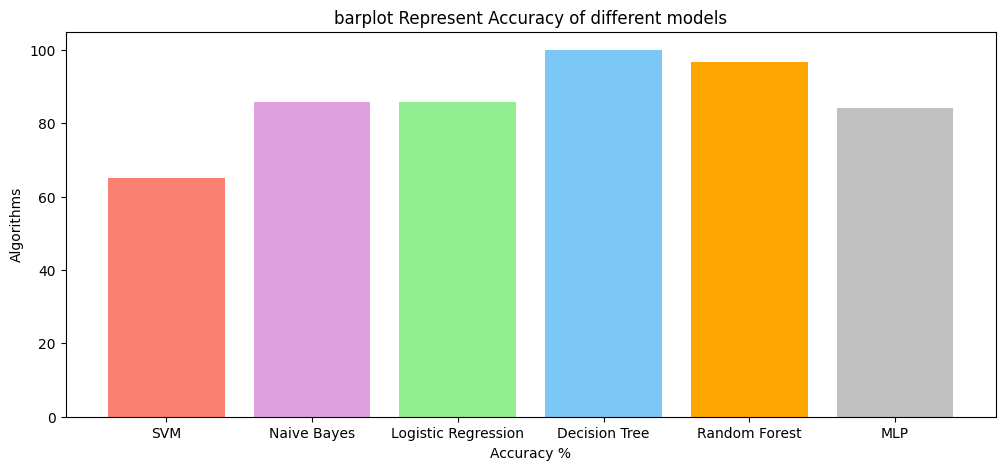

In [ ]:
colors = ['#FA8072','#DDA0DD','#90EE90','#7BC8F6','#FFA500','#C0C0C0','#FFC0CB']
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_comparison['Model'],model_comparison['Accuracy'],color = colors)
plt.show()